# <font color='blue'>Data Science Academy - Introdução à Inteligência Artificial</font>

## Probabilidade

# Markov decision processes (MDPs)

Este notebook demonstra a criação de algoritmos de iteração de valor através de Processos de Decisão de markov (MDP).

In [1]:
# Importando as classes
from mdp import MDP, GridMDP, sequential_decision_environment, value_iteration

## Revisão

Antes de começar a jogar com as implementações reais vamos analisar algumas coisas sobre MDPs.

- Um processo estocástico tem a propriedade de ** Markov ** se a distribuição de probabilidade condicional de estados futuros do processo (condicional em estados passados e presentes) depende somente do estado presente, não da sequência de eventos que a precederam. Muitas vezes é possível modelar muitos fenômenos diferentes como um processo de Markov, sendo flexível com nossa definição de estado.
   

- Os MDPs nos ajudam a lidar com ambientes totalmente observáveis e não-determinísticos / estocásticos. Para lidar com casos parcialmente observáveis e estocásticos usamos a generalização de MDPs denominados POMDPs (processo de decisão de Markov parcialmente observável). Nosso objetivo geral para resolver um MDP é chegar a uma política que nos orienta a selecionar a melhor ação em cada estado, de modo a maximizar a soma esperada de recompensas futuras.

## MDP

Para começar, vejamos a implementação da classe MDP definida em mdp.py A docstring nos diz o que é necessário para definir um MDP, ou seja - conjunto de estados, ações, estado inicial, modelo de transição e uma função de recompensa. Cada um deles é implementado como métodos. Não feche o pop-up para que você possa seguir ao longo da descrição do código abaixo.

In [2]:
# Visualizando o código da classe
%psource MDP

O método ** _ _init_ _ ** incorpora os seguintes parâmetros:

- init: o estado inicial.
- actlist: Lista de ações possíveis em cada estado.
- terminais: lista de estados de terminais onde apenas a ação possível é uma saída
- gama: Fator de desconto. Isso garante que as recompensas atrasadas tenham menos valor em comparação com as imediatas.

O método ** R ** retorna a recompensa para cada estado usando o self.reward dict.

O método ** T ** não está implementado. Aqui retornamos (probabilidade, s ') pares onde s' pertence à lista de estado possível, tomando a a ação no estado s.

O método ** actions ** retorna lista de ações possíveis em cada estado. Por padrão, retorna todas as ações para estados que não sejam estados terminais.


Agora vamos implementar o MDP simples na imagem abaixo. Os estados A, B têm ações X, Y disponíveis neles. Suas probabilidades são mostradas acima das setas. Começamos com o uso do MDP como classe base para o nosso CustomMDP. Obviamente, precisamos fazer algumas mudanças para se adequar ao nosso caso. Fazemos uso de uma matriz de transição como nossas transições não são muito simples.
<img src="mdp-a.png">

In [3]:
# Matriz de transição como dicionário aninhado. Estado -> Ações no estado -> Estados por cada ação -> Probabilidade
t = {
    "A": {
            "X": {"A":0.3, "B":0.7},
            "Y": {"A":1.0}
         },
    "B": {
            "X": {"End":0.8, "B":0.2},
            "Y": {"A":1.0}
         },
    "End": {}
}

init = "A"

terminals = ["End"]

rewards = {
    "A": 5,
    "B": -10,
    "End": 100
}

In [4]:
# Classe CustomMDP
class CustomMDP(MDP):

    def __init__(self, transition_matrix, rewards, terminals, init, gamma=.9):
        # Todas as ações possíveis
        actlist = []
        for state in transition_matrix.keys():
            actlist.extend(transition_matrix.keys())
        actlist = list(set(actlist))

        MDP.__init__(self, init, actlist, terminals=terminals, gamma=gamma)
        self.t = transition_matrix
        self.reward = rewards
        for state in self.t:
            self.states.add(state)

    def T(self, state, action):
        return [(new_state, prob) for new_state, prob in self.t[state][action].items()]

In [5]:
# Finalmente nós instanciamos a classe com os parâmetros para o nosso MDP na imagem.
our_mdp = CustomMDP(t, rewards, terminals, init, gamma=.9)

Com isso, nós representamos com sucesso nosso MDP. Mais tarde, vamos procurar maneiras de resolver este MDP.

## Grid MDP

Agora olhamos para uma implementação concreta que faz uso do MDP como classe base. A classe GridMDP no módulo mdp é usada para representar um mundo de grade MDP. O código deve ser fácil de entender se você tiver passado pelo exemplo do CustomMDP.

In [6]:
%psource GridMDP

O método ** _ _init__ ** toma ** grid ** como um parâmetro extra em comparação com a classe MDP e grid é uma lista aninhada de recompensas em estados.

O método ** go ** retorna o estado indo em direção determinada usando vector_add.

O método ** T ** não está implementado. Aqui retornamos (probabilidade, s ') pares onde s' pertence à lista de estado possível, tomando a a ação no estado s.

O método ** actions ** retorna lista de ações possíveis em cada estado. Por padrão, retorna todas as ações para estados que não sejam estados terminais.

O método ** to_arrows ** é usado para representar a política em uma grade como formato.

Podemos criar um GridMDP da seguinte forma:

    GridMDP([[-0.04, -0.04, -0.04, +1],
            [-0.04, None,  -0.04, -1],
            [-0.04, -0.04, -0.04, -0.04]],
            terminals=[(3, 2), (3, 1)])
            
Na verdade, o ** sequential_decision_environment ** no módulo mdp foi instanciado usando exatamente o mesmo código.

In [7]:
sequential_decision_environment

# Iteração de Valor

Agora que nós vimos como representar MDPs, vamos tentar resolvê-los. Nosso objetivo final é obter uma política ideal. Começamos com a análise da Iteração de Valores e uma visualização que deve nos ajudar a entendê-la melhor.

Começamos por calcular Valor / Utilidade para cada um dos estados. O valor de cada estado é a soma esperada de recompensas futuras descontadas, dado que começamos nesse estado e seguimos uma política particular. O algoritmo Iteração de valor depende de encontrar soluções da equação de Bellman. A intuição Iteração de valores funciona porque os valores se propagam. Este ponto ficará mais claro com a visualização mais abaixo. 

In [8]:
%psource value_iteration

Toma como entradas dois parâmetros um MDP para resolver epsilon o erro máximo permitido na utilidade de qualquer estado. Ele retorna um dicionário contendo utilitários onde as chaves são os estados e os valores representam utilitários. Vamos resolver o ** sequencial_decision_enviornment ** GridMDP.

In [9]:
value_iteration(sequential_decision_environment)

{(0, 0): 0.2962883154554812,
 (0, 1): 0.3984432178350045,
 (0, 2): 0.5093943765842497,
 (1, 0): 0.25386699846479516,
 (1, 2): 0.649585681261095,
 (2, 0): 0.3447542300124158,
 (2, 1): 0.48644001739269643,
 (2, 2): 0.7953620878466678,
 (3, 0): 0.12987274656746342,
 (3, 1): -1.0,
 (3, 2): 1.0}

## Visualização Para a Iteração de Valor

Para ilustrar que os valores se propagam fora dos estados vamos criar uma visualização simples. Estaremos usando uma versão modificada da função value_iteration que armazenará U ao longo do tempo. Também removeremos o parâmetro epsilon e adicionaremos o número de iterações que queremos.

In [10]:
def value_iteration_instru(mdp, iterations=20):
    U_over_time = []
    U1 = {s: 0 for s in mdp.states}
    R, T, gamma = mdp.R, mdp.T, mdp.gamma
    for _ in range(iterations):
        U = U1.copy()
        for s in mdp.states:
            U1[s] = R(s) + gamma * max([sum([p * U[s1] for (p, s1) in T(s, a)])
                                        for a in mdp.actions(s)])
        U_over_time.append(U)
    return U_over_time

Em seguida, definimos uma função para criar a visualização a partir dos utilitários retornados por ** value_iteration_instru **. Abaixo usaremos o Matplotib com IPython Widgets. Se você estiver interessado em ler mais sobre esse recurso acesse [ipywidgets.readthedocs.io] (http://ipywidgets.readthedocs.io)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
import time

def make_plot_grid_step_function(columns, row, U_over_time):
    '''A função interativa ipywidgets suporta
        um único parâmetro como entrada. Esta função
        cria e devolve tal função, tomando
        Na entrada outros parâmetros
    '''
    def plot_grid_step(iteration):
        data = U_over_time[iteration]
        data = defaultdict(lambda: 0, data)
        grid = []
        for row in range(rows):
            current_row = []
            for column in range(columns):
                current_row.append(data[(column, row)])
            grid.append(current_row)
        grid.reverse() 
        fig = plt.imshow(grid, cmap=plt.cm.bwr, interpolation='nearest')

        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

        for col in range(len(grid)):
            for row in range(len(grid[0])):
                magic = grid[col][row]
                fig.axes.text(row, col, "{0:.2f}".format(magic), va='center', ha='center')

        plt.show()
    
    return plot_grid_step

def make_visualize(slider):
    ''' Toma uma entrada de um controle deslizante e retorna
         Função callback para timer e animação
    '''
    
    def visualize_callback(Visualize, time_step):
        if Visualize is True:
            for i in range(slider.min, slider.max + 1):
                slider.value = i
                time.sleep(float(time_step))
    
    return visualize_callback
    

In [12]:
columns = 4
rows = 3
U_over_time = value_iteration_instru(sequential_decision_environment)     

In [13]:
plot_grid_step = make_plot_grid_step_function(columns, rows, U_over_time)

### Clique no botão Visualize

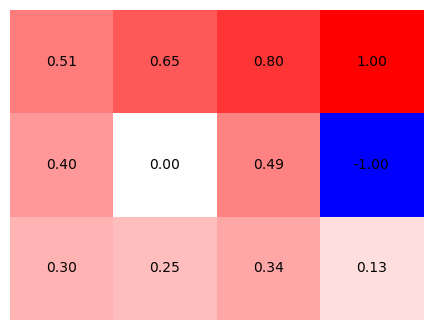

In [14]:
import ipywidgets as widgets
from IPython.display import display

iteration_slider = widgets.IntSlider(min=1, max=15, step=1, value=0)
w=widgets.interactive(plot_grid_step,iteration=iteration_slider)
display(w)

visualize_callback = make_visualize(iteration_slider)

visualize_button = widgets.ToggleButton(desctiption = "Visualize", value = False)
time_select = widgets.ToggleButtons(description='Extra Delay:',options=['0', '0.1', '0.2', '0.5', '0.7', '1.0'])
a = widgets.interactive(visualize_callback, Visualize = visualize_button, time_step=time_select)
display(a)

Mova o controle deslizante acima para observar como o utilitário é alterado nas iterações. Também é possível mover o controle deslizante usando as teclas de seta ou saltar para o valor editando diretamente o número com um duplo clique. O botão ** Visualize ** animará automaticamente o controle deslizante para você. O ** Extra Delay Box ** permite que você defina o atraso em segundos até um segundo para cada passo de tempo.

## FIM